Read in the data and import the packages

In [10]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
from data_personal_example import transaction_data_file, large_pre_gas_prices_file, \
suite_spot_txn

pre_eip=pd.read_csv(large_pre_gas_prices_file)

First we will try to ascertain the distribution of the pre-EIP data.

,hash,block_number,block_timestamp,receipt_gas_used,gas_price
0,0xc9d37faf9270c0aa1a553d4e53777cf1617a606d8a26...,12111333,2021-03-26 00:16:51 UTC,45764,129000000000
1,0xceeee703a7638bfa1eaa0c3d97f31fe211dfb77915e6...,12111413,2021-03-26 00:33:17 UTC,36601,168000000000
2,0x87007e41f34e2c1ea51fe9ff5bde4a039c70f2a218fe...,12111458,2021-03-26 00:42:19 UTC,21000,174000000000
3,0x497a2de3a8a8a2799ead2bb558ba072cbb50c1f2ab8a...,12111280,2021-03-26 00:06:07 UTC,154315,168211840178
4,0x548aa6b360f2b81f0ed437b35af5405dfce857069e71...,12111328,2021-03-26 00:15:32 UTC,21000,154000000000
...,...,...,...,...,...
6264787,0xac03a458748d87b1e03732c7a60f13d3f6278e2dfb84...,12088722,2021-03-22 12:53:38 UTC,21000,165000000000
6264788,0xa10fa129bc83a7d7b85391b7c85ae579b3ab59ef6fd0...,12088822,2021-03-22 13:15:19 UTC,21000,213000000000
6264789,0xa43bb8f1b1d77b3f9770311998bc667e4e393e022021...,12085526,2021-03-22 00:58:55 UTC,112866,181000000000
6264790,0x5a90c80b066cd7577c71ee1e891353535d6e5f16f75c...,12087380,2021-03-22 07:54:46 UTC,21000,6000000000


165103890667.35025 1.4189931621311085e+21
165103890779.07208 165023687758.15295


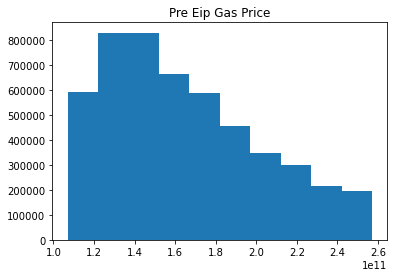

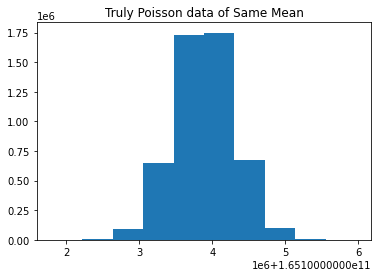

In [25]:
display(pre_eip)




pre_gas_price=list(pre_eip.gas_price)

my_up=np.percentile(pre_gas_price,90)
my_lo=np.percentile(pre_gas_price,10)

pre_gas_price=[x for x in pre_gas_price if (x < my_up) & (x > my_lo)]


fig = plt.figure()
ax = plt.axes()


my_mean=np.mean(pre_gas_price)
my_var=np.var(pre_gas_price)



plt.hist(pre_gas_price)
ax.set_title('Pre Eip Gas Price')
print(my_mean,my_var)



#observations
#variance-1.4189931621311085e+21
#mean-165103890667.35025



my_p_data=np.random.poisson(my_mean,len(pre_gas_price))

fig2 = plt.figure()
ax2 = plt.axes()

plt.hist(my_p_data)
ax2.set_title('Truly Poisson data of Same Mean')
print(np.mean(my_p_data),np.var(my_p_data))



Clearly the data is opperating substantially differently than a poisson r.v of the same mean. Furthermore, in the data, the mean and variance are substantially different, which should not be the case for truly poisson distributed data. Fuyrthermore, poisson data has the property of being able to be approximated by the binomial distribution for large values of n; therefore, like the binomial distribution, it will converge into the shape of a bell. curve for large values of n, clearly not meeting the requirments of our data